Nguyễn Văn Quốc Việt 

Github:https://github.com/vietkitoo/datamingLab4.git

Lab4

In [ ]:
from  sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

I. Classification 

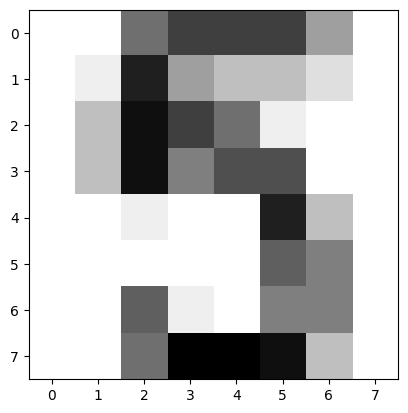

In [ ]:
plt.imshow(digits.images[1010],cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

II. Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve



<ipython-input-7-44079500a680>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


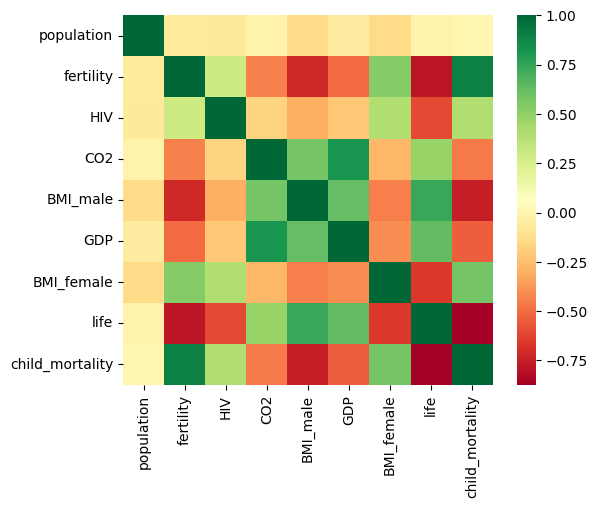

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab/gapminder.csv')
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

0.6192442167740035


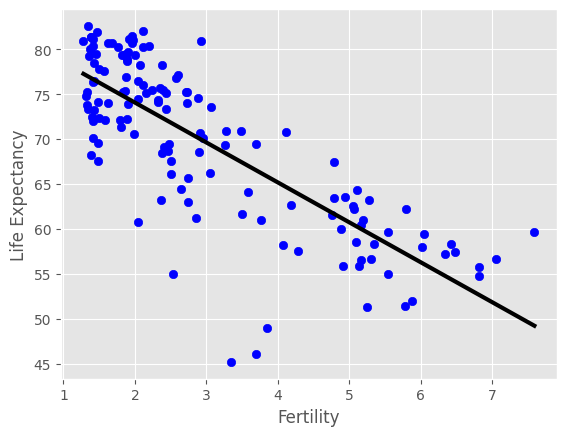

In [ ]:
# modified/added by Jinny
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


y = df['life'].values
X = df.drop('life', axis=1)

# Reshape to 1-D
y = y.reshape(-1, 1)
X_fertility = X['fertility'].values.reshape(-1, 1) 

_ = plt.scatter(X['fertility'], y, color='blue')
_ = plt.ylabel('Life Expectancy')
_ = plt.xlabel('Fertility')

# -----------------------
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
features = pd.read_csv('/content/drive/MyDrive/Colab/gapminder.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab/gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_life, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred


# Compute and print R^2 and RMSE
print(reg_all.score(features, y_life))


0.8914651485793176


Linear Regression using PyTouch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

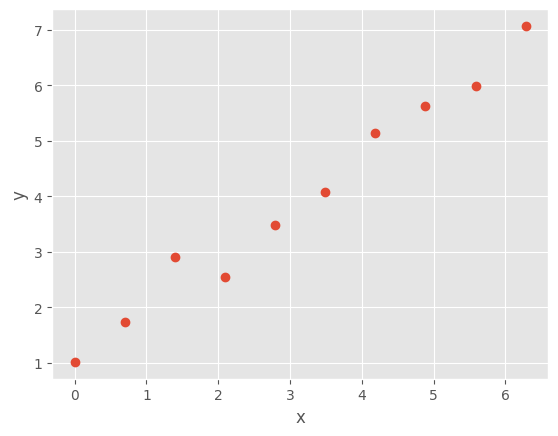

In [ ]:
N =10
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y=m*x + c+ np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import torch

Dataset

In [ ]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x=x
    self.y=y

  def __len__(self):
      return len(self.x)
  

  def __getitem__(self, idx): 
    sample = {
      'feature': torch.tensor ([1, self.x[idx]]), 
      'label': torch.tensor ([self.y[idx]])}
    return sample


  

In [ ]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
  sample = dataset[i]
  print(i, sample['feature'], sample['label'])


0 tensor([1., 0.], dtype=torch.float64) tensor([1.0164], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([1.7337], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.9161], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.5498], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.4759], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([4.0820], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([5.1494], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.6323], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.9814], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([7.0712], dtype=torch.float64)


Data Loader

In [ ]:
from torch.utils.data import DataLoader
dataset= MyDataset(x, y)
batch_size = 4 
shuffle = True
num_workers = 4
dataloader = DataLoader( dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers )


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import pprint as pp
for i_batch, samples in enumerate (dataloader):
  print('\nbatch# = %s' % i_batch)
  print('samples: ')
  pp.pprint(samples)



batch# = 0
samples: 
{'feature': tensor([[1.0000, 0.6981],
        [1.0000, 6.2832],
        [1.0000, 4.8869],
        [1.0000, 2.0944]], dtype=torch.float64),
 'label': tensor([[1.7337],
        [7.0712],
        [5.6323],
        [2.5498]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 4.1888],
        [1.0000, 5.5851],
        [1.0000, 0.0000],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[5.1494],
        [5.9814],
        [1.0164],
        [3.4759]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 3.4907]], dtype=torch.float64),
 'label': tensor([[2.9161],
        [4.0820]], dtype=torch.float64)}


Model

In [ ]:
import torch.nn as nn
import torch.nn. functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim): 
      super (MyModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)
    def forward (self, x):
      out = self.linear(x)
      return out


In [ ]:
input_dim = 2
output_dim = 1

model = MyModel(input_dim, output_dim)

In [ ]:
cost = nn.MSELoss()

Minimizing the cost function

In [ ]:
num_epochs = 10  # How many times the entire training data is seen?
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

dataset = MyDataset(torch.Tensor(x), torch.Tensor(y)) # Convert x and y to tensors
batch_size = 4
shuffle = True
num_workers = 4
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate(training_sample_generator):
        features = samples['feature'].float() # Convert features to float
        labels = samples['label'].float() # Convert labels to float
        
        predictions = model(features)
        error = cost(predictions, labels)
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        
        optimiser.zero_grad()
        error.backward()
        optimiser.step()

Epoch = 0
	Batch = 0, Error = 16.080753326416016
	Batch = 1, Error = 3.2166643142700195
	Batch = 2, Error = 3.49302077293396
Epoch = 1
	Batch = 0, Error = 2.1732747554779053
	Batch = 1, Error = 0.3818305730819702
	Batch = 2, Error = 0.09576883912086487
Epoch = 2
	Batch = 0, Error = 0.49714598059654236
	Batch = 1, Error = 0.04546111822128296
	Batch = 2, Error = 0.058440499007701874
Epoch = 3
	Batch = 0, Error = 0.03401978313922882
	Batch = 1, Error = 0.20697179436683655
	Batch = 2, Error = 0.08448780328035355
Epoch = 4
	Batch = 0, Error = 0.17761501669883728
	Batch = 1, Error = 0.05170098692178726
	Batch = 2, Error = 0.03771276772022247
Epoch = 5
	Batch = 0, Error = 0.008370615541934967
	Batch = 1, Error = 0.07998424768447876
	Batch = 2, Error = 0.33755457401275635
Epoch = 6
	Batch = 0, Error = 0.045413047075271606
	Batch = 1, Error = 0.1590140163898468
	Batch = 2, Error = 0.12259859591722488
Epoch = 7
	Batch = 0, Error = 0.051617346704006195
	Batch = 1, Error = 0.1846628487110138
	Batc

Lets see how well the model has learnt the data

In [ ]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


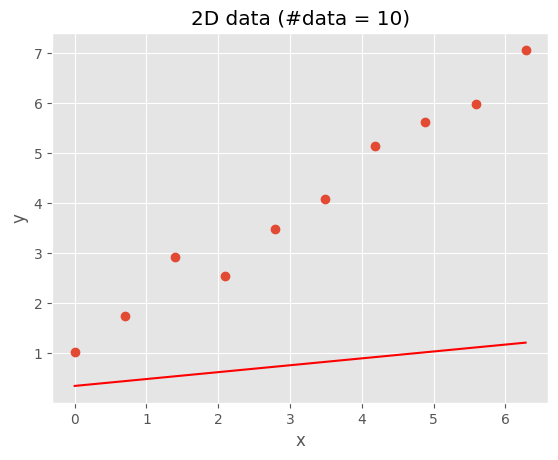

In [ ]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

III. Recommendation Systems

In [ ]:
def user_cf(M, metric='cosine'): 
  pred = np.copy (M)
  n_users, n_items= M. shape
  avg_ratings = np.nanmean (M, axis=1)
  sim_users = sim_matrix(M, 'user', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan (M[i, j]):
        pred[i, j] = avg_ratings[i] + np.nansum(sim_users[i] * (M[:,j] - avg_ratings)) / sum(sim_users[i])
  return pred


In [ ]:
def item_cf(M, metric='cosine'):
  pred = np.copy (M)
  n_users, n_items = M. shape
  avg_ratings = np.nanmean (M, axis=0)
  sim_items = sim_matrix (M, 'item', metric)
  for i in range(n_users):
    for j in range(n_items):
      if np.isnan (M[i, j]):
        pred[i, j] = avg_ratings[j] + np.nansum(sim_items[j] * (M[i,:] - avg_ratings)) / sum(sim_items[j])
  return pred


IV. Exercises 


1

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
type(iris.data)



numpy.ndarray

In [ ]:
type(iris.target)

numpy.ndarray

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [ ]:
X_train.shape


(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
y_test.shape

(30,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train,y_train)
     y_pred=knn.predict(X_test)
     scores[k] = metrics.accuracy_score(y_test,y_pred)
     scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

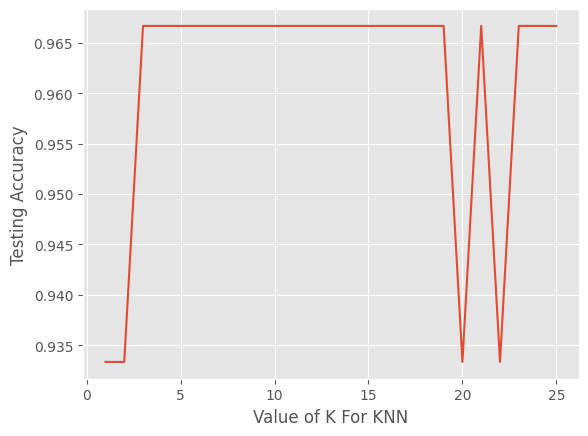

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K For KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier()

In [ ]:
#0 =setosa, 1-versicolor, 2-virginica
classes = {0: 'setosa',1: 'versicolor',2: 'virginica'}
#Making prediction on some unseen data
#predict for the below two random observations
x_new = [[3,4,5,2],
        [5,4,2,2]]
y_predict = knn.predict(x_new)
print (classes [y_predict[0]])
print(classes [y_predict[1]])


versicolor
setosa


2.Recommendation Systems 

In [ ]:

import chardet
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity


%matplotlib inline
pd.set_option('display.max_colwidth', 300)

file_path = "/content/movies.csv"
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

movies = pd.read_csv(file_path, encoding=encoding)

In [ ]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
95,96,In the Bleak Midwinter (1995),Comedy
96,97,Hate (Haine,NaN
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [ ]:
movies['genres'][0]

"Animation|Children's|Comedy"

In [ ]:
genres_col = movies['genres'][0]
genres_col

"Animation|Children's|Comedy"

In [ ]:
unique_genres = set()
for genres in genres_list:
    # Check if the value is a string
    if isinstance(genres, str):
        for genre in genres.split('|'):
            unique_genres.add(genre)


In [ ]:
list(unique_genres)

['Thriller',
 'Musical',
 'Sci-Fi',
 'Drama',
 'Action',
 'Romance',
 'Documentary',
 'Comedy',
 'Animation',
 'Crime',
 "Children's",
 'Horror',
 'War',
 'Adventure',
 'Fantasy']

In [ ]:
genres_df = movies['genres'].str.get_dummies('|')

Ij = pd.concat([meta['movie_id'], genres_df], axis=1).groupby('movie_id').sum().values

Ij[:4] 

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
file_path = "/content/ratings.csv"
ratings = pd.read_csv(file_path)

merged_df = pd.merge(ratings, movies, on='movie_id')

In [ ]:
unique_user_ids = sorted(list(set(merged_df['user_id'])))

In [ ]:
Uj = np.zeros((len(unique_user_ids), len(unique_genres)), dtype=int)
for i, user_id in enumerate(unique_user_ids):
    user_ratings = merged_df.loc[merged_df['user_id'] == user_id]
    user_genre_list = [genre.split('|') if type(genre) == str else [] for genre in user_ratings['genres']]
    user_genre_set = set([genre for sublist in user_genre_list for genre in sublist])
    for j, genre in enumerate(unique_genres):
        if genre in user_genre_set:
            Uj[i, j] = 1

In [ ]:
Uj[:4]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]])

In [ ]:
hot_matrix = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).sum(level=0)
Umatrix = np.zeros((len(unique_user_ids), hot_matrix.shape[1]), dtype=int)
for i, user_id in enumerate(unique_user_ids):
    user_ratings = merged_df.loc[merged_df['user_id'] == user_id]
    user_genre_list = [genre.split('|') if type(genre) == str else [] for genre in user_ratings['genres']]
    user_genre_set = set([genre for sublist in user_genre_list for genre in sublist])
    for j, genre in enumerate(hot_matrix.columns):
        if genre in user_genre_set:
            Umatrix[i, j] = 1

<ipython-input-116-bcf32e0b206e>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  hot_matrix = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).sum(level=0)


In [ ]:
cos_sim_matrix = cosine_similarity(hot_matrix, Umatrix)
cos_sim_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40824829, 0.40824829, 0.40824829, ..., 0.40824829, 0.40824829,
        0.40824829],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

b. Collaborative Filtering Recommendation Model by Users

In [ ]:
train_data, test_data = train_test_split(ratings, test_size=0.5, random_state=42)


In [ ]:
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').astype('float64')

In [ ]:
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id',values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id',values='rating').fillna(0)

In [ ]:
train_data_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,5.0,4.0,3.0,3.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0
2,3.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,0.0,0.0,2.0,0.0,4.0,3.0
3,0.0,0.0,0.0,0.0,3.0,5.0,3.0,0.0,0.0,3.0,...,0.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,4.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,3.0,3.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,4.0,0.0,...,2.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,1.0
97,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,2.0,3.0,4.0,0.0,5.0,5.0,0.0,4.0,0.0
98,0.0,0.0,5.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,3.0,0.0,5.0,0.0,1.0
2,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,4.0,3.0,0.0,0.0,0.0,4.0,3.0,0.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,1.0,3.0,3.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,...,3.0,4.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,5.0
5,2.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,...,0.0,4.0,4.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0
97,0.0,0.0,5.0,4.0,1.0,0.0,5.0,3.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
98,4.0,3.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,4.0,...,4.0,0.0,0.0,0.0,0.0,4.0,5.0,4.0,0.0,0.0


In [ ]:
user_item_matrix = ratings.pivot_table(index='user_id', columns='movie_id', values='rating')

# Fill missing values with zeros
user_item_matrix.fillna(0, inplace=True)

# Compute the cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

# Set the similarity of a user with itself to zero to avoid bias
np.fill_diagonal(user_similarity, 0)

# Convert the similarity matrix to a DataFrame
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Print the user similarity DataFrame
user_similarity_df

user_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.659405,0.712804,0.657609,0.714024,0.744576,0.737577,0.704376,0.743509,0.725336,...,0.719974,0.682774,0.776399,0.718313,0.720822,0.608013,0.777531,0.712249,0.650891,0.708817
2,0.659405,0.000000,0.671245,0.651387,0.672551,0.690275,0.682956,0.645386,0.694076,0.606212,...,0.730974,0.651005,0.737935,0.619306,0.752715,0.632412,0.655829,0.722981,0.628887,0.563098
3,0.712804,0.671245,0.000000,0.733855,0.677525,0.770274,0.781070,0.788985,0.725987,0.706745,...,0.743822,0.705761,0.706500,0.668125,0.681837,0.684491,0.733191,0.702587,0.666538,0.693357
4,0.657609,0.651387,0.733855,0.000000,0.655317,0.690185,0.712806,0.717791,0.692795,0.632853,...,0.694948,0.720329,0.667426,0.644162,0.651261,0.664637,0.664093,0.678822,0.644996,0.665181
5,0.714024,0.672551,0.677525,0.655317,0.000000,0.727555,0.748732,0.617220,0.742476,0.630065,...,0.658254,0.712397,0.731631,0.633300,0.771216,0.722897,0.803425,0.679927,0.607889,0.684257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.608013,0.632412,0.684491,0.664637,0.722897,0.715118,0.679554,0.613909,0.672005,0.624879,...,0.622438,0.671327,0.635767,0.631758,0.662345,0.000000,0.617852,0.675014,0.648274,0.606282
97,0.777531,0.655829,0.733191,0.664093,0.803425,0.724305,0.711004,0.699529,0.731617,0.706187,...,0.688385,0.667025,0.762760,0.650637,0.710603,0.617852,0.000000,0.693105,0.642179,0.778856
98,0.712249,0.722981,0.702587,0.678822,0.679927,0.737966,0.705897,0.684135,0.747506,0.689478,...,0.725459,0.673323,0.670991,0.709346,0.726292,0.675014,0.693105,0.000000,0.659619,0.644709


In [ ]:
def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

In [ ]:
user_prediction = predict(train_data_matrix, user_similarity)

<ipython-input-130-24e27d8d51cd>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-130-24e27d8d51cd>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
print('User-based CF RMSE: ', sqrt(mean_squared_error(test_data_matrix, user_prediction)))

User-based CF RMSE:  1.8553951615856052


In [ ]:
train_predictions = predict(train_data_matrix, user_similarity)

<ipython-input-130-24e27d8d51cd>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
<ipython-input-130-24e27d8d51cd>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T


In [ ]:

train_predictions = train_predictions.flatten()
train_actual = train_data_matrix.values.flatten()

In [ ]:
train_rmse = mean_squared_error(train_actual, train_predictions, squared=False)

print("Train RMSE:", train_rmse)
print('Test RMSE: ', sqrt(mean_squared_error(test_data_matrix, user_prediction)))

Train RMSE: 1.8087256787548665
Test RMSE:  1.8553951615856052


c. Collaborative Filtering Recommendation Model by Items.



❖ Calculate the item correlation

In [ ]:
item_data_matrix = train_data_matrix.T

item_similarity = 1 - pairwise_distances(item_data_matrix, metric='cosine')

In [ ]:
item_similarity

array([[1.        , 0.39953237, 0.1766731 , ..., 0.26940947, 0.40510037,
        0.46934463],
       [0.39953237, 1.        , 0.38423277, ..., 0.43327959, 0.28705854,
        0.28691115],
       [0.1766731 , 0.38423277, 1.        , ..., 0.32193675, 0.34447018,
        0.22199935],
       ...,
       [0.26940947, 0.43327959, 0.32193675, ..., 1.        , 0.34532473,
        0.2627873 ],
       [0.40510037, 0.28705854, 0.34447018, ..., 0.34532473, 1.        ,
        0.28877754],
       [0.46934463, 0.28691115, 0.22199935, ..., 0.2627873 , 0.28877754,
        1.        ]])

❖ Implement function to predict ratings based on Item Similarity.


In [ ]:
def predict_item_similarity(train_data_matrix, item_similarity):
    # Set similarity of item to itself to 0
    np.fill_diagonal(item_similarity, 0)
    
    # Predict ratings using item-based collaborative filtering
    pred_ratings = train_data_matrix.dot(item_similarity) / np.abs(item_similarity).sum(axis=0)
    
    return pred_ratings

In [ ]:
predicted_rating = predict_item_similarity(train_data_matrix, item_similarity)
predicted_rating

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.294454,1.314988,1.352628,1.341127,1.302891,1.280258,1.391321,1.268803,1.297192,1.289326,...,1.334849,1.273830,1.309667,1.290991,1.281677,1.251005,1.312899,1.277810,1.332288,1.253624
2,1.192456,1.207799,1.179627,1.158219,1.208629,1.137364,1.075799,1.206306,1.202223,1.209542,...,1.131596,1.220321,1.217867,1.201384,1.198120,1.145593,1.179696,1.228725,1.201701,1.146046
3,1.211542,1.134208,1.155624,1.152422,1.200031,1.176486,1.192799,1.162346,1.219413,1.227586,...,1.143567,1.126115,1.153137,1.212283,1.163911,1.236458,1.147755,1.223702,1.122110,1.167886
4,1.205381,1.233167,1.191335,1.148788,1.170357,1.197440,1.156023,1.124256,1.175571,1.194375,...,1.140421,1.147580,1.181636,1.206066,1.178248,1.201609,1.246494,1.190970,1.198674,1.184581
5,1.238203,1.221165,1.253783,1.205633,1.238752,1.217470,1.252301,1.241104,1.224485,1.229573,...,1.250678,1.286220,1.254011,1.237764,1.160095,1.311866,1.211660,1.259850,1.218190,1.258747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.992153,1.010300,0.962383,1.029273,1.032978,0.962330,0.933846,1.029387,0.985776,1.016921,...,0.964385,0.935807,0.940017,0.976095,1.030379,0.952267,0.956391,0.934937,0.943275,0.978900
97,1.498679,1.473556,1.468939,1.427572,1.442869,1.475042,1.426443,1.507002,1.519199,1.493562,...,1.502588,1.492371,1.461267,1.515010,1.397105,1.542684,1.557050,1.509811,1.514286,1.471671
98,1.101771,1.204966,1.222332,1.192508,1.195867,1.224610,1.163538,1.200038,1.200969,1.166708,...,1.152709,1.179639,1.269804,1.089277,1.163215,1.176428,1.113860,1.190811,1.178380,1.171279


❖ Predict on train dataset and compare the RMSE with the test dataset.


In [ ]:
item_similarity = cosine_similarity(train_data_matrix.T)
np.fill_diagonal(item_similarity, 0)  # set similarity of item to itself to 0

# Predict ratings on train dataset using item-based collaborative filtering
def predict_ratings_item_based(train_data_matrix, similarity_matrix):
    pred_ratings = np.dot(train_data_matrix, similarity_matrix) / np.abs(similarity_matrix).sum(axis=0)
    return pred_ratings

train_pred_ratings = predict_ratings_item_based(train_data_matrix, item_similarity)

# Convert DataFrames to numpy arrays before applying 'nonzero' method
train_data_matrix_np = train_data_matrix.to_numpy()
test_data_matrix_np = test_data_matrix.to_numpy()

# Compute RMSE for train dataset
train_pred_ratings_flat = train_pred_ratings[train_data_matrix_np.nonzero()]
train_actual_ratings_flat = train_data_matrix_np[train_data_matrix_np.nonzero()]
train_rmse = np.sqrt(np.mean((train_pred_ratings_flat - train_actual_ratings_flat)**2))

# Predict ratings on test dataset using item-based collaborative filtering
test_pred_ratings = predict_ratings_item_based(test_data_matrix_np, item_similarity)

# Compute RMSE for test dataset
test_pred_ratings_flat = test_pred_ratings[test_data_matrix_np.nonzero()]
test_actual_ratings_flat = test_data_matrix_np[test_data_matrix_np.nonzero()]
test_rmse = np.sqrt(np.mean((test_pred_ratings_flat - test_actual_ratings_flat)**2))

print("Train RMSE: ", train_rmse)
print("Test RMSE: ", test_rmse)


Train RMSE:  2.3879224077094197
Test RMSE:  2.4650055478309434


**Compare the results between User-based and Item-based. Make conclusion**

Collaborative Filtering Recommendation Model by Items:

Train RMSE: 2.3879224077094197

Test RMSE: 2.4650055478309434
Collaborative Filtering Recommendation Model by Users

Train RMSE: 1.8087256787548665

Test RMSE: 1.8553951615856052

Comparing the results between the User-based and Item-based Collaborative Filtering models, 
we can see that the User-based model performs better than the Item-based model on both the 
train and test datasets, as the RMSE values are lower. This indicates that the User-based 
model is able to make more accurate predictions of ratings for users on both seen and unseen 
movies in the dataset.

However, it's important to note that the difference in RMSE between the two models is not 
significant, and both models are able to provide useful recommendations to users. 
Additionally, the performance of the models may vary depending on the specific characteristics 
of the dataset and the application domain.

Overall, the results suggest that the User-based Collaborative Filtering model may be a better 
choice for providing movie recommendations in this specific dataset.